In [1]:
import pandas as pd
import csv
from pyecharts.charts import Timeline, Bar, Pie,Line
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
import jieba

In [24]:
tags = pd.read_csv('27MarTopTotalSearch.csv')
tags = tags.iloc[:,:5]
tags.columns= ['content','end time','start time','search volume','related?']
tags.head() 

,content,end time,start time,search volume,related?
0,肖战工作室道歉,2/3/2020 14:00,1/3/2020 21:48,8580306,0.0
1,郑恺苗苗,10/3/2020 20:22,10/3/2020 10:42,6104855,0.0
2,唐艺昕肚子,16/3/2020 19:30,16/3/2020 11:26,5821712,0.0
3,张檬金恩圣公布恋情,20/3/2020 5:44,19/3/2020 10:06,5711930,0.0
4,刘真去世,23/3/2020 16:58,23/3/2020 10:44,5553134,0.0


In [30]:
tags[tags['related?']==1]

,content,end time,start time,search volume,related?,date,time
9,张文宏预测新冠病毒最终发展,5/3/2020 7:10,4/3/2020 10:58,4695464,1.0,5/3/2020,7:10
13,蒋超良辞去湖北省人大常委会主任职务,6/3/2020 13:58,6/3/2020 8:10,4288994,1.0,6/3/2020,13:58
15,带全家来京确诊女子被美国公司解雇,20/3/2020 18:42,20/3/2020 11:04,4209540,1.0,20/3/2020,18:42
19,NASA出现确诊病例,18/3/2020 16:54,18/3/2020 10:20,3690743,1.0,18/3/2020,16:54
20,滞留武汉亲戚家8人挤两室一厅,5/3/2020 17:50,5/3/2020 10:46,3630095,1.0,5/3/2020,17:50
23,当初批评中国的防疫措施西方都用了,24/3/2020 16:10,24/3/2020 9:52,3536724,1.0,24/3/2020,16:10
24,张伟丽无奈滞留美国,17/3/2020 18:22,17/3/2020 10:46,3520298,1.0,17/3/2020,18:22
28,武汉仍有社区散发病例,16/3/2020 16:40,16/3/2020 11:38,3162415,1.0,16/3/2020,16:40
30,大学生瞒父母游13国回国发热被隔离,13/3/2020 16:20,13/3/2020 9:06,3116725,1.0,13/3/2020,16:20
35,男子在赴美航班上死亡,15/3/2020 19:22,15/3/2020 11:46,2964011,1.0,15/3/2020,19:22


In [31]:
#split date and time
def DateSplit(df, col):
    temp_df = df[col].str.split(' ',expand=True)
    temp_df.columns = ["date","time"]
    df = pd.concat([df,temp_df],axis=1)
    #df = df.drop("date",axis=1)
    return df

In [32]:
tags = DateSplit(df=tags,col='end time')
tags.head()

,content,end time,start time,search volume,related?,date,time,date,time
0,肖战工作室道歉,2/3/2020 14:00,1/3/2020 21:48,8580306,0.0,2/3/2020,14:00,2/3/2020,14:00
1,郑恺苗苗,10/3/2020 20:22,10/3/2020 10:42,6104855,0.0,10/3/2020,20:22,10/3/2020,20:22
2,唐艺昕肚子,16/3/2020 19:30,16/3/2020 11:26,5821712,0.0,16/3/2020,19:30,16/3/2020,19:30
3,张檬金恩圣公布恋情,20/3/2020 5:44,19/3/2020 10:06,5711930,0.0,20/3/2020,5:44,20/3/2020,5:44
4,刘真去世,23/3/2020 16:58,23/3/2020 10:44,5553134,0.0,23/3/2020,16:58,23/3/2020,16:58


<b>First visualization - barchart 50 records of raw dataset among the top search</B>

In [33]:
top50raw = tags.sort_values('search volume',ascending=False).head(50)

In [34]:
# x-axis = common timeline y-axis = volume (if dont have such timeline; add 0 volume)
def prepareaxis(top50raw):
    # -- x-axis -- 
    # convert date to datetime object and sort
    top50raw['date']=pd.to_datetime(top50raw.date,format="%d/%m/%Y")
    top50_sorteddate = top50raw.sort_values('date')
    # convert back to string for comparison
    date_axis =top50_sorteddate['date'].dt.strftime('%d-%m-%Y').unique()
    top50_sorteddate['date'] = top50_sorteddate['date'].dt.strftime('%d-%m-%Y')
    # --- y-axis ---

    related_data = []
    non_related_data = []
    for eachdate in date_axis:
        volume_related = 0
        volume_nonrelated = 0
        for index, row in top50_sorteddate.iterrows():
            currentdate = row['date']
            
            # if the date in df equals current date in axis
            if eachdate == currentdate:
                # prepare data with relavancy
                if row['related?'] == 1:
                    volume_related+= row['search volume']
                else:
                     volume_nonrelated+= row['search volume']
        #append to list
        related_data.append(volume_related)
        non_related_data.append(volume_nonrelated)
                
                
    return date_axis,related_data,non_related_data

# sort by volume, retrive the top 50 volumes topics
top50raw = tags.sort_values('search volume',ascending=False).head(50)
# convert date to datetime object and sort
top50raw['date']=pd.to_datetime(top50raw.date,format="%d/%m/%y")
top50_sorteddate = top50raw.sort_values('date')
top50_sorteddate
# convert back to string for comparison
date_axis = top50_sorteddate['date'].dt.strftime('%d-%m-%Y').unique()
date_axis

In [35]:
top50raw = tags.sort_values('search volume',ascending=False).head(50)

In [36]:
top50raw.head()

,content,end time,start time,search volume,related?,date,time,date,time
0,肖战工作室道歉,2/3/2020 14:00,1/3/2020 21:48,8580306,0.0,2/3/2020,14:00,2/3/2020,14:00
1,郑恺苗苗,10/3/2020 20:22,10/3/2020 10:42,6104855,0.0,10/3/2020,20:22,10/3/2020,20:22
2,唐艺昕肚子,16/3/2020 19:30,16/3/2020 11:26,5821712,0.0,16/3/2020,19:30,16/3/2020,19:30
3,张檬金恩圣公布恋情,20/3/2020 5:44,19/3/2020 10:06,5711930,0.0,20/3/2020,5:44,20/3/2020,5:44
4,刘真去世,23/3/2020 16:58,23/3/2020 10:44,5553134,0.0,23/3/2020,16:58,23/3/2020,16:58


In [37]:
top50raw = tags.sort_values('search volume',ascending=False).head(50)
date_axis,related_volume,non_related_volume = prepareaxis(top50raw)

ValueError: cannot assemble with duplicate keys

In [38]:
date_axis,related_volume,non_related_volume = prepareaxis(top50raw)
# fit the bar chart
colors = ["#5793f3", "#d14a61", "#675bba"]
bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(
        date_axis.tolist()
    )
    .add_yaxis(
        series_name="Search Volume of COVID-19 related Topics",
        yaxis_data=related_volume,
        label_opts=opts.LabelOpts(is_show=True),
        gap= "0%"
    )
    .add_yaxis(
        series_name="Search Volume of COVID-19 non-related Topics",
        yaxis_data=non_related_volume,
        gap= "0%"
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
        title_opts=opts.TitleOpts(title="content bar chart"),
        datazoom_opts=opts.DataZoomOpts(type_="inside"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    )

)

bar.render('27MarTopSearch_barchart.html')

ValueError: cannot assemble with duplicate keys

In [39]:

c = (
    Line()
    .add_xaxis(date_axis.tolist())
    .add_yaxis(
        "Search Volume of COVID-19 related Topics",
        related_volume,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")],symbol_size=100),

    )
    .add_yaxis(
        "Search Volume of COVID-19 non-related Topics",
        non_related_volume,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),

    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="AreaChart-27Mar"),
        datazoom_opts=opts.DataZoomOpts(type_="inside"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    )
    
)
c.render_notebook()
c.render('27MarTopSearch_areachart.html')

'/Users/MIYA/Desktop/IS 434/Project/2. filetered_top_topic/27MarTopSearch_areachart.html'

## Incorrect visualization ; the x-axis doesn't align with the y-axis data

In [100]:
colors = ["#5793f3", "#d14a61", "#675bba"]
bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(sorted_tags['内容'].values.tolist())
    .add_yaxis(
        series_name="Search Volume",
        yaxis_data=sorted_tags['热度'].values.tolist(),
        
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="content bar chart"),
        datazoom_opts=opts.DataZoomOpts(type_="inside"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    )
)

bar.render_notebook()

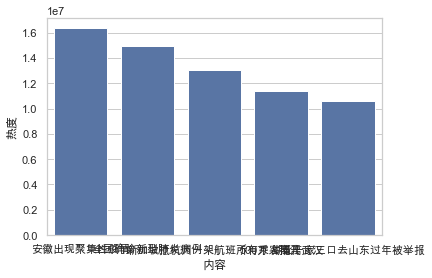

In [37]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.barplot(x="内容", y="热度", data=sorted_tags,label="Total", color="b")

In [1]:

from pyecharts import options as opts

In [46]:
sorted_tags['内容'].values.tolist()

['安徽出现聚集性疫情',
 '全国确诊新型肺炎病例',
 '新加坡抵杭州一架航班所有乘客隔离',
 '500万人离开武汉',
 '湖北一家三口去山东过年被举报',
 '新型肺炎确诊440例死亡9例',
 '浙江成功分离到新型冠状病毒毒株',
 '新型肺炎已致湖北17人死亡',
 '广东启动重大突发公共卫生事件一级响应',
 '澳门取消所有春节庆祝活动',
 '囧妈初一上线免费播出',
 '全国累计确诊病例4515例',
 '广东发现6起家庭聚集性疫情',
 '全国确诊830例新型肺炎病例',
 '传染病学专家表示疫情已刻不容缓',
 '专家回应假期是否需再延长',
 '新型肺炎确诊人数超过非典',
 '新型冠状病毒来源是野生动物',
 '大年初一全国票房仅181万',
 '湖北省长表示痛心内疚自责',
 '多所高校延期开学',
 '明星捐款',
 '最新疫情地图',
 '女军医摘下口罩后落泪',
 '武汉现状',
 '华南海鲜市场存在大量新冠病毒',
 '武汉要求全市在公共场合佩戴口罩',
 '新年安康',
 '全国确诊新型肺炎病例',
 '武汉确诊病例可能再增加约1000例',
 '境内确诊217例新型冠状病毒肺炎病例',
 '武汉给市民朋友的一封信',
 '全国确诊新型肺炎病例',
 '新型肺炎病毒存在变异可能',
 '湖北商务厅副厅长感染新冠病毒',
 '国内确诊291例新型冠状病毒肺炎病例',
 '全国确诊新型肺炎病例',
 '泰国发现1例新型冠状病毒病例',
 '全国累计确诊新型肺炎2744例',
 '总理来武汉',
 '不会因春运返程出现大传染',
 '治愈患者还会二次感染吗',
 '最新疫情地图',
 '李兰娟回应返程人员是否要隔离',
 '肺炎疫情下的春运',
 '17例新型肺炎死亡病例病情公布',
 '春节档能不能改档',
 '抗病毒喷剂',
 'N95口罩',
 '武汉15名医务人员感染新型冠状病毒',
 '武汉病毒核酸日检测量预计可达2000份']

In [47]:
sorted_tags['热度'].values.tolist()

[16360270,
 14972975,
 13061134,
 11412070,
 10554971,
 10231631,
 10025927,
 8644255,
 8228748,
 7879944,
 7768150,
 7501900,
 6760344,
 6387802,
 6317411,
 6091872,
 6056169,
 5678858,
 5451178,
 5217833,
 4960564,
 4878384,
 4665509,
 4649774,
 4179531,
 3843257,
 3825252,
 3805393,
 3770652,
 3711517,
 3634194,
 3613705,
 3612854,
 3606375,
 3575731,
 3456072,
 3418305,
 3312221,
 3287825,
 3267768,
 3207942,
 3190977,
 3171527,
 3121338,
 3106153,
 3058733,
 3053630,
 2955179,
 2871900,
 2819942,
 2789472]

In [48]:
bar = Bar()
bar.add_xaxis(sorted_tags['内容'].values.tolist())
bar.add_yaxis("volume",sorted_tags['热度'].values.tolist())
bar.render_notebook()